# matplotlib 描画訓練ノート
個別実装例を集めるノートである。ある程度、実装例がたまったら整理して体系化したノートにする。

# 軸の任意の書式の実現
matplotlib.ticker.FuncFormatter 関数を使うと便利である。  
https://matplotlib.org/api/ticker_api.html?highlight=funcformatter#matplotlib.ticker.FuncFormatter

以下の説明にあるように、二つの引数(x,y)を受け取る点に注意。
> Use a user-defined function for formatting.
> The function should take in two inputs (a tick value x and a position pos), and return a string containing the corresponding tick label.

以下の実装例では、unixtimestamp のリストを正規乱数分布に従って生成し、そのヒストグラムを描画している。  
Xの値は unixtimestamp なので、それを datetime.datetime.fromtimestamp() で datetime型に変換し、strftime() で書式を整形している。  
取引が集中している時間帯のヒストグラム描画(x軸＝取引時間)の場合には、FuncFormatter が役に立つ。

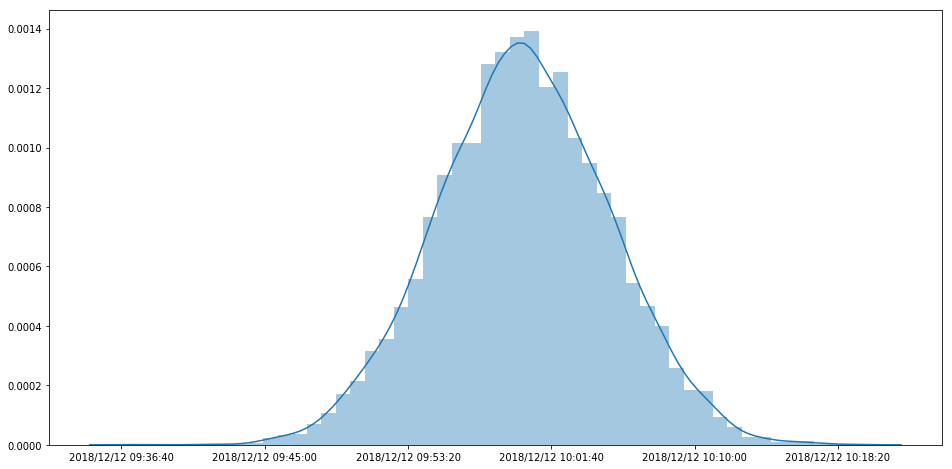

In [7]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from numpy.random import randn,randint,normal
import seaborn as sns
from dateutil.parser import parse

# base_time を中心に、σ=300(sec) の正規乱数分布のunixtimestamp を生成する。
base_time = parse('2018-12-12 10:00:00')
base_time.timestamp()
time_series = normal(base_time.timestamp(), 300, size=(10000))

plt.figure(figsize=(16,8))
ax = sns.distplot(time_series, bins=50, kde=True)

# x,y の二つの引数を受け取る点に注意
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,y:datetime.datetime.fromtimestamp(x).strftime('%Y/%m/%d %H:%M:%S')))
plt.show()